# BIS - Vacation Work
## Group Details: Group 2

## Content:
### Section 1: Anomaly detection for 'date' dataset 
### Section 2: Anomaly detection for 'allevents' dataset




## Problem Statement:
#### As a group we are required to use a machine learning algorithm in order to detect anomalies for dataset 'allevents' and 'date'


## Library import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
from numpy import interp
from ydata_profiling import ProfileReport
import dtale

# Date Anomaly detection

# Section 1.1 : Data Import and Preview

### Importing the Dataset

#### Loading the dataset and display the first few rows

In [2]:
df = pd.read_csv('date2008_pipe.txt',sep= "|") 
df.head(8)

dateid     caldate day  week month  qtr  year  holiday
0    1827  2008-01-01  WE     1   JAN    1  2008     True
1    1828  2008-01-02  TH     1   JAN    1  2008    False
2    1829  2008-01-03  FR     1   JAN    1  2008    False
3    1830  2008-01-04  SA     2   JAN    1  2008    False
4    1831  2008-01-05  SU     2   JAN    1  2008    False
5    1832  2008-01-06  MO     2   JAN    1  2008    False
6    1833  2008-01-07  TU     2   JAN    1  2008    False
7    1834  2008-01-08  WE     2   JAN    1  2008    False

#### Dataset summary on number of rows, columns and data types for each row

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   dateid   365 non-null    int64 
 1   caldate  365 non-null    object
 2   day      365 non-null    object
 3   week     365 non-null    int64 
 4   month    365 non-null    object
 5   qtr      365 non-null    int64 
 6   year     365 non-null    int64 
 7   holiday  365 non-null    bool  
dtypes: bool(1), int64(4), object(3)
memory usage: 20.4+ KB


# Section 1.2: Exploratory Data Analysis (EDA)

### Initial Data Exploration

#### Identifying and handling missing values if there are any

In [4]:
df.isnull().sum()

dateid     0
caldate    0
day        0
week       0
month      0
qtr        0
year       0
holiday    0
dtype: int64

### Since there are no missing values in the data, there will be no to fill in null values

## Data Visualization

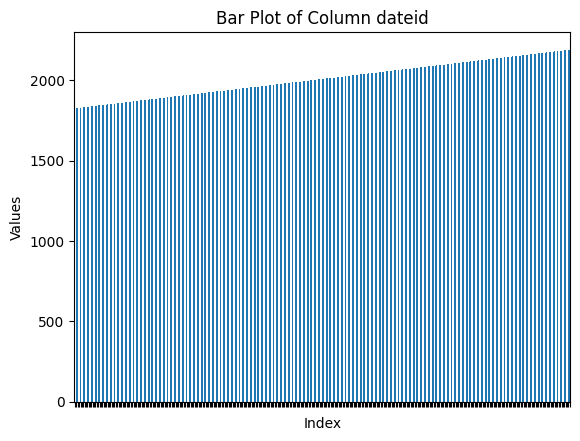

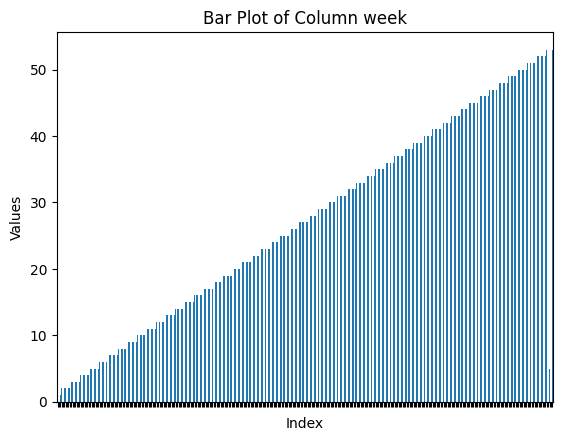

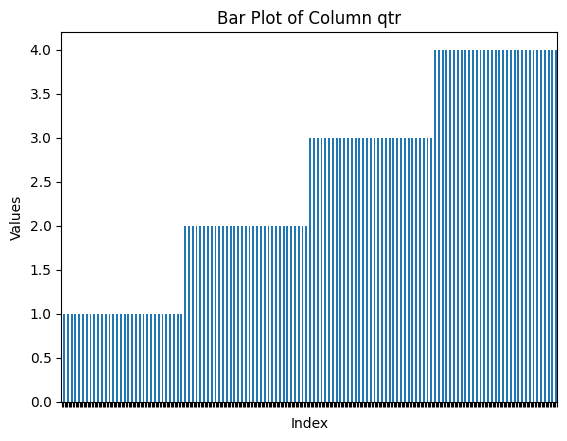

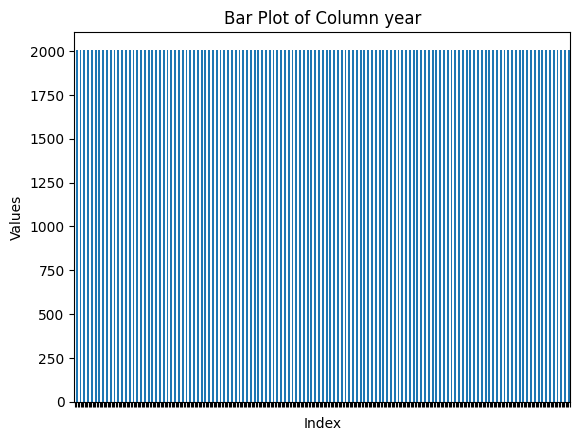

In [5]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Plotting each numeric column as a bar plot
for column in numeric_columns:
    plt.figure()  # Create a new figure for each plot (optional)
    df[column].plot(kind='bar')
    plt.title(f'Bar Plot of Column {column}')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.gca().xaxis.set_ticklabels([])
    plt.show()

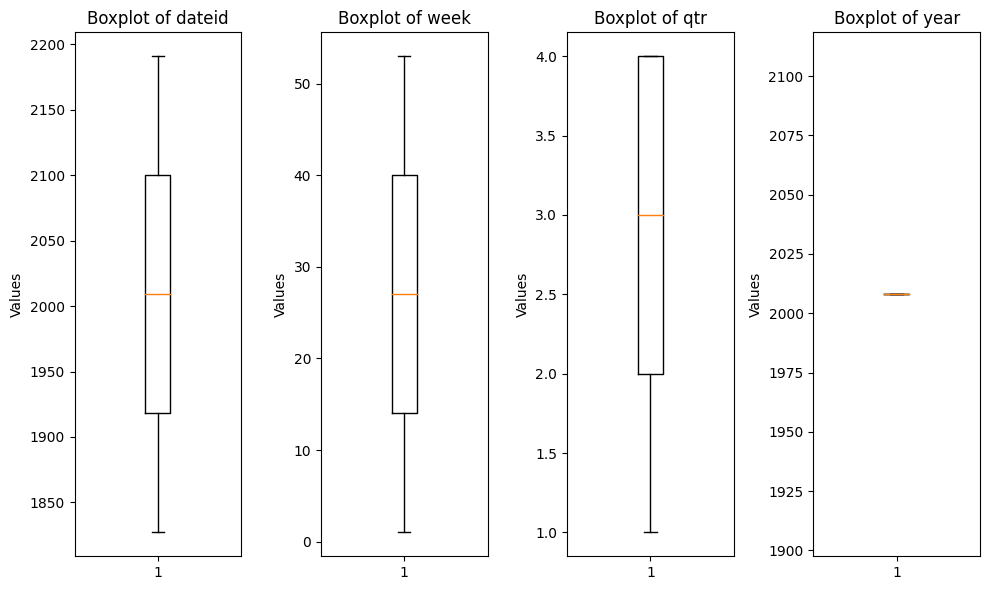

In [6]:
plt.figure(figsize=(10, 6))  
for i, column in enumerate(numeric_columns):
    plt.subplot(1, len(numeric_columns), i + 1)
    plt.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Values')

plt.tight_layout() 
plt.show()

In [7]:
profile = ProfileReport(df, title="Date2008_pipe")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
profile.to_file("date2008_pipe.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
def get_value_counts(dataframe):
    for column in dataframe.columns:
        print(dataframe[column].value_counts())
        print('---------------------------------------------------------------------------------')
        print('')

In [10]:
df_copy = df.copy()
get_value_counts(df_copy)

dateid
1827    1
2078    1
2076    1
2075    1
2074    1
       ..
1947    1
1946    1
1945    1
1944    1
2191    1
Name: count, Length: 365, dtype: int64
---------------------------------------------------------------------------------

caldate
2008-01-01    1
2008-09-09    1
2008-09-07    1
2008-09-06    1
2008-09-05    1
             ..
2008-05-01    1
2008-04-30    1
2008-04-29    1
2008-04-28    1
2008-12-31    1
Name: count, Length: 365, dtype: int64
---------------------------------------------------------------------------------

day
WE    53
TH    52
FR    52
SA    52
SU    52
MO    52
TU    52
Name: count, dtype: int64
---------------------------------------------------------------------------------

week
4     8
5     8
45    8
27    7
38    7
29    7
30    7
31    7
32    7
33    7
34    7
35    7
36    7
37    7
41    7
39    7
2     7
42    7
43    7
46    7
47    7
48    7
49    7
50    7
28    7
26    7
52    7
25    7
3     7
6     7
7     7
8     7
9     7
10    7
11

#### Based on the counts and the diagrams, it can be seen that dateid has unique values which might not be useful as no grouping can be done on date dimentsion. Looking at distrinution of the holidays it will also not be used as this only occurs in the year 2008, so holiday grouping would also not prove useful groups since each holdiday is unique. The year is constant so it is a reduntant dimension. The clustering in this dimension will be the same for all entries so it will be dropped. The caldate although having unique values could be use by extracting the days and months to create two additional dimensions which could prove useful. 

#### Explanations for the bar graph shows count of the number of occureances at each entry on the dataset. The box and whisker was made to try to find if any outliers can be visibilty seen. Looking at the diagram it is diffuclt to see any outlier values as all values in the entry are what we expect a year calander distribution to look lile

# Section 1.3 : Preprocessing

### Data Preprocessing

#### This is a converstion of the caldate to a time dataframe. The reason this was doen is to split the caldate dataframe to generate new columnms points for months and days as this may become useful in the anomoly detection. 

In [11]:
df_copy['caldate2'] = pd.to_datetime(df_copy['caldate'])

In [12]:
df_copy['month1'] = df_copy['caldate2'].dt.month
df_copy['day1'] = df_copy['caldate2'].dt.day
df_copy.head(5)

dateid     caldate day  week month  qtr  year  holiday   caldate2  month1   
0    1827  2008-01-01  WE     1   JAN    1  2008     True 2008-01-01       1  \
1    1828  2008-01-02  TH     1   JAN    1  2008    False 2008-01-02       1   
2    1829  2008-01-03  FR     1   JAN    1  2008    False 2008-01-03       1   
3    1830  2008-01-04  SA     2   JAN    1  2008    False 2008-01-04       1   
4    1831  2008-01-05  SU     2   JAN    1  2008    False 2008-01-05       1   

   day1  
0     1  
1     2  
2     3  
3     4  
4     5

#### Dropping these columns as they will not be relevant for anomaly detection 

In [13]:
columns_to_drop = ['dateid','caldate','caldate2','year','holiday']

In [14]:
df_columns_dropped = df_copy.drop(columns=columns_to_drop)

In [15]:
df_columns_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     365 non-null    object
 1   week    365 non-null    int64 
 2   month   365 non-null    object
 3   qtr     365 non-null    int64 
 4   month1  365 non-null    int32 
 5   day1    365 non-null    int32 
dtypes: int32(2), int64(2), object(2)
memory usage: 14.4+ KB


## Character Encoding

### This encoding was done specifically on the months to match the numbers extracted from caldate

In [16]:
month_to_custom_encoding = {
    'JAN': 1,  
    'FEB': 2, 
    'MAR': 3, 
    'APR':4,
    'MAY': 5,
    'JUN':6,
    'JUL':7,
    'AUG':8,
    'SEP':9,
    'OCT':10,
    'NOV':11,
    'DEC':12
 
}

In [17]:
df_columns_dropped['month']= df_columns_dropped['month'].replace(month_to_custom_encoding)
df_columns_dropped.head(5)


day  week  month  qtr  month1  day1
0  WE     1      1    1       1     1
1  TH     1      1    1       1     2
2  FR     1      1    1       1     3
3  SA     2      1    1       1     4
4  SU     2      1    1       1     5

#### This is to apply encoding to the days columns

In [18]:
def character_encoding(df):
    # Convert object types to string types
    for label, content in df.items():
        if pd.api.types.is_object_dtype(content):
            df[label] = content.astype('|S')

    # Convert string types to category type
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()

    # Turn categorical variables into numbers 
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Add a binary column to indicate whether sample had missing value
            df[label] = pd.Categorical(content).codes 

    return df

In [19]:
df_encoded = character_encoding(df_columns_dropped)

In [20]:
df_encoded.head(5)

day  week  month  qtr  month1  day1
0    6     1      1    1       1     1
1    4     1      1    1       1     2
2    0     1      1    1       1     3
3    2     2      1    1       1     4
4    3     2      1    1       1     5

In [21]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   day     365 non-null    int8 
 1   week    365 non-null    int64
 2   month   365 non-null    int64
 3   qtr     365 non-null    int64
 4   month1  365 non-null    int32
 5   day1    365 non-null    int32
dtypes: int32(2), int64(3), int8(1)
memory usage: 11.9 KB


# Section 1.4: Correlation Analysis using Dtale

### Correlation Analysis

In [22]:
dtale_report = dtale.show(df_encoded, ignore_duplicates=True)
dtale_report.open_browser()

#### Looking at the correlation between the columns, the correlation in days and days1 seem not important. High correlation means there is a relationship between the two columns. This is good for clustering as the grouping becomes better and outliers are spotted easier. 

In [23]:
columns_to_drop = ['day','day1']
df_encoded = df_encoded.drop(columns=columns_to_drop)

#### Looking at the report, the correlation between the remaining columsn are really high

In [24]:
dtale_report = dtale.show(df_encoded, ignore_duplicates=True)
dtale_report.open_browser()

# Section 1.5: Anomaly Detection Model

### Fitting the Model (Local Outlier Factor)

In [25]:
clf = LocalOutlierFactor(n_neighbors=4,contamination=0.01)
predictions = clf.fit_predict(df_encoded)
predictions

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [26]:
prediction_scores = clf.negative_outlier_factor_
prediction_scores

array([-5.00000000e+09, -5.00000000e+09, -5.00000000e+09, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -3.00000000e+10, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -

In [27]:
y = pd.value_counts(predictions)
y

 1    362
-1      3
Name: count, dtype: int64

In [28]:
predictions_df = pd.DataFrame(predictions,columns= ['PREDICTIONS'])
predictions_df.head(5)

PREDICTIONS
0            1
1            1
2            1
3            1
4            1

In [29]:
prediction_scores_df = pd.DataFrame(prediction_scores,columns= ['PREDICTION_SCORES'])
prediction_scores_df.head(5)

PREDICTION_SCORES
0      -5.000000e+09
1      -5.000000e+09
2      -5.000000e+09
3      -1.000000e+00
4      -1.000000e+00

In [30]:
df_copy.head(5)

dateid     caldate day  week month  qtr  year  holiday   caldate2  month1   
0    1827  2008-01-01  WE     1   JAN    1  2008     True 2008-01-01       1  \
1    1828  2008-01-02  TH     1   JAN    1  2008    False 2008-01-02       1   
2    1829  2008-01-03  FR     1   JAN    1  2008    False 2008-01-03       1   
3    1830  2008-01-04  SA     2   JAN    1  2008    False 2008-01-04       1   
4    1831  2008-01-05  SU     2   JAN    1  2008    False 2008-01-05       1   

   day1  
0     1  
1     2  
2     3  
3     4  
4     5

In [31]:
df_merged = [df_copy,predictions_df,prediction_scores_df]
df_merged = pd.concat(df_merged,axis=1)
df_merged_sorted = df_merged.sort_values(by=['PREDICTION_SCORES']) 
df_merged_sorted.head(5)

dateid     caldate day  week month  qtr  year  holiday   caldate2   
362    2189  2008-12-29  MO     5   DEC    4  2008    False 2008-12-29  \
274    2101  2008-10-02  TH     4   OCT    4  2008    False 2008-10-02   
17     1844  2008-01-18  SA     4   JAN    4  2008    False 2008-01-18   
212    2039  2008-08-01  FR    31   AUG    3  2008    False 2008-08-01   
150    1977  2008-05-31  SA    23   MAY    2  2008    False 2008-05-31   

     month1  day1  PREDICTIONS  PREDICTION_SCORES  
362      12    29           -1      -1.010144e+11  
274      10     2           -1      -9.304317e+10  
17        1    18           -1      -3.000000e+10  
212       8     1            1      -1.000000e+10  
150       5    31            1      -1.000000e+10

In [32]:
X = df_encoded[['week','month','qtr','month1']].values

#### The scatter plot below shows the two anomolies specifically date id 2189 and 2101 which has the wrong weeks entries

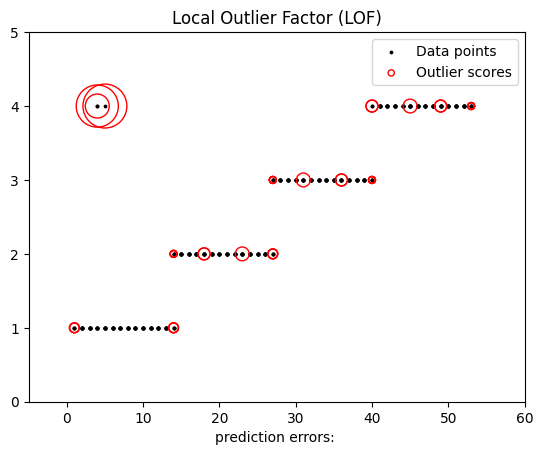

In [33]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection


def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])


plt.scatter(X[:, 0], X[:, 2],color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (prediction_scores.max() - prediction_scores) / (prediction_scores.max() - prediction_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 2],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 60))
plt.ylim((0, 5))
plt.xlabel("prediction errors: " )
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()

#### The scatter plot below shows the wrong qtr for date id 1844. 

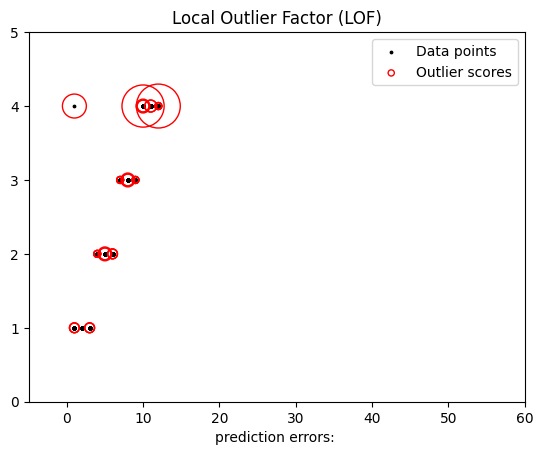

In [34]:
plt.scatter(X[:, 1], X[:, 2],color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (prediction_scores.max() - prediction_scores) / (prediction_scores.max() - prediction_scores.min())
scatter = plt.scatter(
    X[:, 1],
    X[:, 2],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 60))
plt.ylim((0, 5))
plt.xlabel("prediction errors: " )
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()

#### Since this is a multidimensional clustering two dimension can only be observed at the same time. 

### Other algorithms for confirmation

### Using K-means clustering

In [35]:
from sklearn.cluster import KMeans

K = 4
kmeans = KMeans(n_clusters=K, random_state=44)
kmeans.fit(df_encoded)
distances = kmeans.transform(df_encoded)
nearest_cluster_distance = np.min(distances, axis=1)

#Choosing the 99% percentile range
threshold = np.percentile(nearest_cluster_distance, 99)
predictions = np.where(nearest_cluster_distance > threshold, -1, 1)
prediction_scores = nearest_cluster_distance
predictions_df = pd.DataFrame(predictions, columns=['PREDICTIONS'])
prediction_scores_df = pd.DataFrame(prediction_scores, columns=['PREDICTION_SCORES'])
df_copy = df.copy()
df_merged = pd.concat([df_copy, predictions_df, prediction_scores_df], axis=1)
df_merged_sorted = df_merged.sort_values(by=['PREDICTION_SCORES'], ascending=False)

print(df_merged_sorted.head(5))


     dateid     caldate day  week month  qtr  year  holiday  PREDICTIONS   
362    2189  2008-12-29  MO     5   DEC    4  2008    False           -1  \
274    2101  2008-10-02  TH     4   OCT    4  2008    False           -1   
272    2099  2008-09-30  TU    40   SEP    3  2008    False            1   
269    2096  2008-09-27  SA    40   SEP    3  2008    False            1   
270    2097  2008-09-28  SU    40   SEP    3  2008    False            1   

     PREDICTION_SCORES  
362          14.374221  
274          11.890900  
272           6.989783  
269           6.989783  
270           6.989783  


### Isolation Forest

In [36]:
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)
clf = IsolationForest(contamination=0.01, random_state=rng)
clf.fit(df_encoded)

predictions = clf.predict(df_encoded)
prediction_scores = clf.decision_function(df_encoded)
predictions_df = pd.DataFrame(predictions, columns=['PREDICTIONS'])
prediction_scores_df = pd.DataFrame(prediction_scores, columns=['PREDICTION_SCORES'])


df_merged = pd.concat([df_copy, predictions_df, prediction_scores_df], axis=1)
df_merged_sorted = df_merged.sort_values(by='PREDICTIONS')


print(df_merged_sorted.head(5))

     dateid     caldate day  week month  qtr  year  holiday  PREDICTIONS   
274    2101  2008-10-02  TH     4   OCT    4  2008    False           -1  \
362    2189  2008-12-29  MO     5   DEC    4  2008    False           -1   
17     1844  2008-01-18  SA     4   JAN    4  2008    False           -1   
247    2074  2008-09-05  FR    36   SEP    3  2008    False            1   
246    2073  2008-09-04  TH    36   SEP    3  2008    False            1   

     PREDICTION_SCORES  
274          -0.093860  
362          -0.102275  
17           -0.091901  
247           0.081884  
246           0.081884  


# Section 2 : Allevents Anomaly Detection

# Section 2.1: Importing The dataset

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
from numpy import interp
from ydata_profiling import ProfileReport
import dtale
import seaborn as sns
df=pd.read_csv('SrcAllevents_pipe.txt', sep='|')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8798 entries, 0 to 8797
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   eventid    8798 non-null   int64 
 1   venueid    8798 non-null   int64 
 2   catid      8798 non-null   int64 
 3   dateid     8798 non-null   int64 
 4   eventname  8798 non-null   object
 5   starttime  8798 non-null   object
dtypes: int64(4), object(2)
memory usage: 412.5+ KB


In [38]:
df.head()

eventid  venueid  catid  dateid                    eventname   
0        1      305      8    1851              Gotterdammerung  \
1        2      306      8    2114                Boris Godunov   
2        3      302      8    1935                       Salome   
3        4      309      8    2090  La Cenerentola (Cinderella)   
4        5      302      8    1982                 Il Trovatore   

             starttime  
0   2008/1/25 14:30:00  
1  2008/10/15 20:00:00  
2   2008/4/19 14:30:00  
3   2008/9/21 14:30:00  
4    2008/6/5 19:00:00

### The SrcAllevents_pipe consists of columns, 8798 rows. eventid, venueid, catid and dateid columns are integers. whilst, the eventname and starttime columns are object data. 

# Section 2.2: Exploratory Data Analysis

# Initial Data Exploration

In [39]:
df.isnull()

eventid  venueid  catid  dateid  eventname  starttime
0       False    False  False   False      False      False
1       False    False  False   False      False      False
2       False    False  False   False      False      False
3       False    False  False   False      False      False
4       False    False  False   False      False      False
...       ...      ...    ...     ...        ...        ...
8793    False    False  False   False      False      False
8794    False    False  False   False      False      False
8795    False    False  False   False      False      False
8796    False    False  False   False      False      False
8797    False    False  False   False      False      False

[8798 rows x 6 columns]

In [40]:
df.describe()

eventid      venueid        catid       dateid
count  8798.000000  8798.000000  8798.000000  8798.000000
mean   4399.500000   139.448852     8.045238  2007.344283
std    2539.908168    92.146241     1.176674   105.886050
min       1.000000     1.000000     6.000000  1827.000000
25%    2200.250000    58.000000     7.000000  1914.000000
50%    4399.500000   115.000000     9.000000  2007.000000
75%    6598.750000   225.000000     9.000000  2099.000000
max    8798.000000   309.000000     9.000000  2191.000000

In [41]:
df.nunique()

eventid      8798
venueid       204
catid           4
dateid        365
eventname     576
starttime    1925
dtype: int64

### The dataset doesn't contain any null values and all columns are not unique except for the eventid.

# Data visualisation

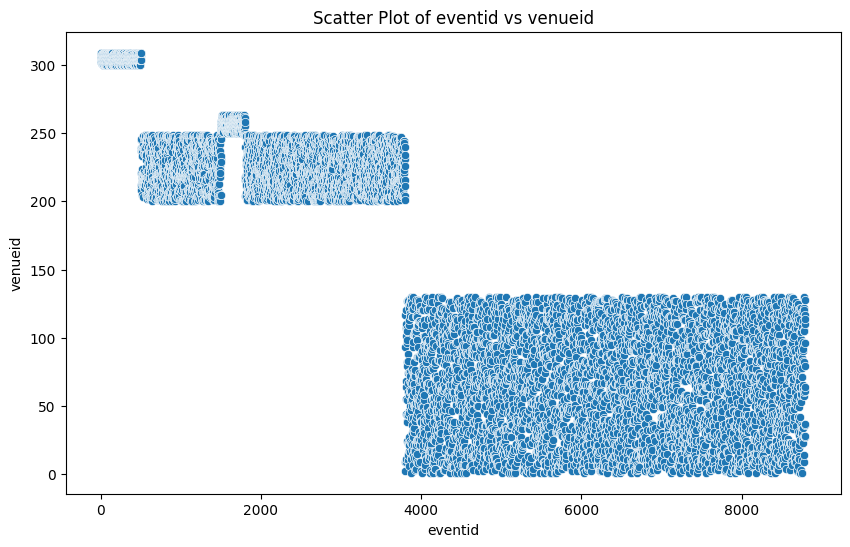

In [42]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='eventid', y='venueid')
plt.xlabel('eventid')
plt.ylabel('venueid')
plt.title('Scatter Plot of eventid vs venueid')
plt.show()

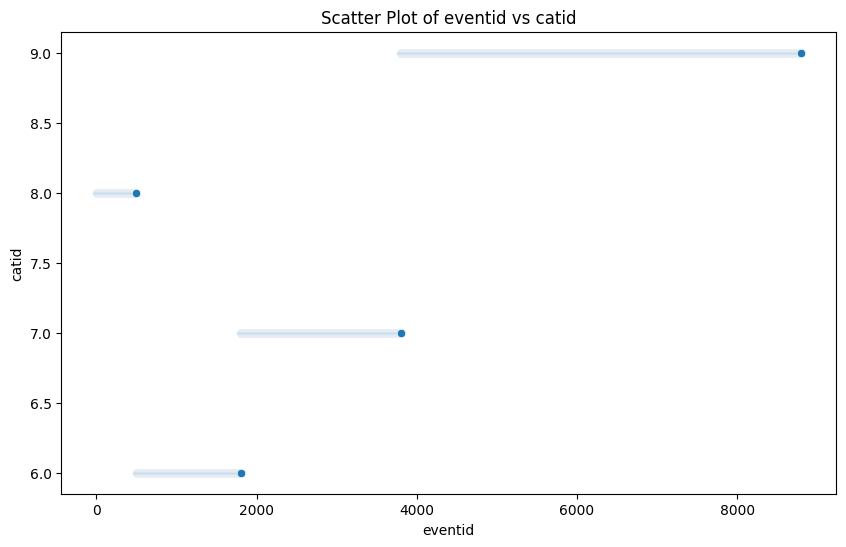

In [43]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='eventid', y='catid')
plt.xlabel('eventid')
plt.ylabel('catid')
plt.title('Scatter Plot of eventid vs catid')
plt.show()

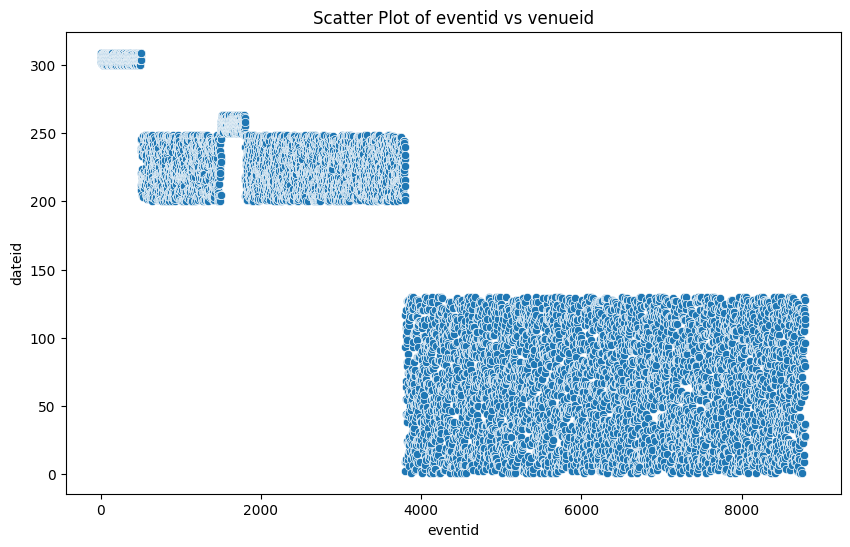

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,x='eventid', y='venueid')
plt.xlabel('eventid')
plt.ylabel('dateid')
plt.title('Scatter Plot of eventid vs venueid')
plt.show()

# Section 2.3: Preprocessing

In [45]:
df_copy = df.copy()

In [46]:
# columns information

def get_value_counts(dataframe):
    for column in dataframe.columns:
        print(dataframe[column].value_counts())
        print('---------------------------------------------------------------------------------')
        print('')

In [47]:
get_value_counts(df_copy)

eventid
1       1
5869    1
5863    1
5864    1
5865    1
       ..
2927    1
2926    1
2925    1
2924    1
8798    1
Name: count, Length: 8798, dtype: int64
---------------------------------------------------------------------------------

venueid
220    81
217    81
203    80
222    74
216    72
       ..
250    18
59     18
262    17
251    16
261    16
Name: count, Length: 204, dtype: int64
---------------------------------------------------------------------------------

catid
9    4998
7    2000
6    1300
8     500
Name: count, dtype: int64
---------------------------------------------------------------------------------

dateid
2002    39
1954    37
1999    37
1945    36
1830    36
        ..
1948    13
2183    12
1912    12
2093    12
2019    11
Name: count, Length: 365, dtype: int64
---------------------------------------------------------------------------------

eventname
Mamma Mia!          92
Spring Awakening    73
Macbeth             70
The Country Girl    69
Jersey Boys 

In [48]:
# Feature encoding

def character_encoding(df):
    # Convert object types to string types
    for label, content in df.items():
        if pd.api.types.is_object_dtype(content):
            df[label] = content.astype('|S')

    # Convert string types to category type
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()

    # Turn categorical variables into numbers 
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Add a binary column to indicate whether sample had missing value
            df[label] = pd.Categorical(content).codes 

    return df

In [49]:
df_encoded = character_encoding(df_copy)

In [50]:
df_encoded.head(5)

eventid  venueid  catid  dateid  eventname  starttime
0        1      305      8    1851        209         97
1        2      306      8    2114         68        213
2        3      302      8    1935        437       1100
3        4      309      8    2090        301       1829
4        5      302      8    1982        236       1364

In [51]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_copy)
df_normalized= pd.DataFrame(df_normalized)
df_normalized.head()

0         1         2         3         4         5
0  0.000000  0.987013  0.666667  0.065934  0.363478  0.050416
1  0.000114  0.990260  0.666667  0.788462  0.118261  0.110707
2  0.000227  0.977273  0.666667  0.296703  0.760000  0.571726
3  0.000341  1.000000  0.666667  0.722527  0.523478  0.950624
4  0.000455  0.977273  0.666667  0.425824  0.410435  0.708940

In [52]:
profile = ProfileReport(df_encoded, title="Allevents_pipe")

In [53]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
profile.to_file("AllEvents_pipe.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
columns=['eventid','venueid','dateid','starttime']
df_dropped=df_encoded.drop(columns,axis=1)

In [56]:
df_dropped.head()

catid  eventname
0      8        209
1      8         68
2      8        437
3      8        301
4      8        236

#### The data was normalised and encoded. the starttime and eventname feature was converted from an object data type to integers data type in to make sure that all data is in numerical format. A profile report was run and it showed that the eventid is unique. In the Analysis of the correlation of the features, it was found that the starttime and dateid have close to 0 correlation factor to other features. From this analysis, the eventid, startime and dateid features were dropped from the dataset.

# Section 1.4: Correlation Analysis using Dtale

In [57]:
dtale_report = dtale.show(df_encoded, ignore_duplicates=True)
dtale_report.open_browser()

In [58]:
clf = LocalOutlierFactor(n_neighbors=4,contamination=0.001)
predictions = clf.fit_predict(df_encoded)
predictions

array([ 1, -1,  1, ...,  1,  1,  1])

In [59]:
prediction_scores = clf.negative_outlier_factor_
prediction_scores

array([-1.12626424, -1.7557441 , -1.25783334, ..., -1.01823309,
       -1.01963176, -1.1831722 ])

In [60]:
y = pd.value_counts(predictions)
y

 1    8789
-1       9
Name: count, dtype: int64

In [61]:
predictions_df = pd.DataFrame(predictions,columns= ['PREDICTIONS'])
predictions_df.head(5)

PREDICTIONS
0            1
1           -1
2            1
3            1
4            1

In [62]:
prediction_scores_df = pd.DataFrame(prediction_scores,columns= ['PREDICTION_SCORES'])
prediction_scores_df.head(5)

PREDICTION_SCORES
0          -1.126264
1          -1.755744
2          -1.257833
3          -1.081924
4          -1.335498

In [63]:
df_copy.head(5)

eventid  venueid  catid  dateid  eventname  starttime
0        1      305      8    1851        209         97
1        2      306      8    2114         68        213
2        3      302      8    1935        437       1100
3        4      309      8    2090        301       1829
4        5      302      8    1982        236       1364

In [64]:
df_merged = [df_copy,predictions_df,prediction_scores_df]
df_merged = pd.concat(df_merged,axis=1)
df_merged_sorted = df_merged.sort_values(by=['PREDICTION_SCORES']) 
df_merged_sorted.head(10)

eventid  venueid  catid  dateid  eventname  starttime  PREDICTIONS   
636       637      243      6    1888         50        993           -1  \
1153     1154      248      6    1939        510       1130           -1   
1539     1540      255      6    1940         59       1135           -1   
1776     1777      250      6    1974        575       1212           -1   
1070     1071      248      6    1860        344        826           -1   
1647     1648      259      6    1996        575       1280           -1   
1600     1601      252      6    1978        465       1217           -1   
1           2      306      8    2114         68        213           -1   
1502     1503      257      6    2100        335        177           -1   
3799     3800      211      7    2148        553        406            1   

      PREDICTION_SCORES  
636           -2.074233  
1153          -1.898381  
1539          -1.875820  
1776          -1.865486  
1070          -1.829914  
1647          -1.814199  
1600          -1.775869  
1             -1.755744  
1502          -1.732455  
3799          -1.716001

# Model Evaluation

In [65]:
columns=['catid','eventname']
X = df_encoded[columns].values

Text(0.5, 1.0, 'Local Outlier Factor (LOF)')

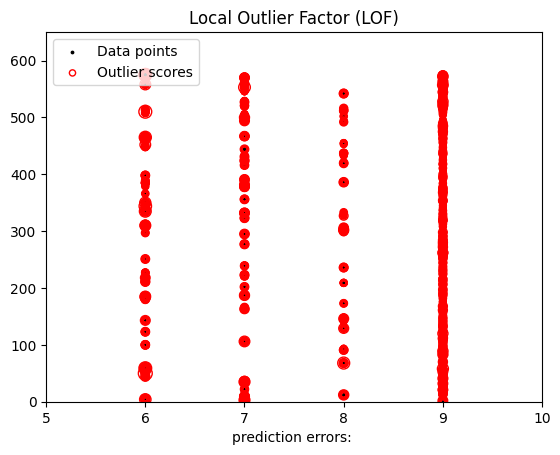

In [66]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection


def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])


plt.scatter(X[:, 0], X[:, 1],color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (prediction_scores_df.max() - prediction_scores_df) / (prediction_scores_df.max() - prediction_scores_df.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=100 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((5, 10))
plt.ylim((0, 650))
plt.xlabel("prediction errors: " )
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")

## Summary and Conclusion

### Unsupervised machine learning clustering was used to return anomalies in the data. Using exploratory data analysis, columns that were chosen were used in the clustering algorithms to detect anomalies